#### 1. Step and Load Data
##### 1.1 Install Dependencies and Steup

In [3]:
#!conda install tensorflow tensorflow-gpu opencv-python matplotlib  Win 版

# Mac 版
!pip install --upgrade pip
!pip install tensorflow-macos tensorflow-metal
!conda install matplotlib
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 505.4 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.8/200.8 MB 4.4 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 105.7 kB/s eta 0:00:00:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.2 MB/s eta 0:00:0000:0100:010m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 4.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━

In [7]:
!pip list

Package                  Version
------------------------ -----------
absl-py                  1.4.0
anyio                    3.6.2
appnope                  0.1.2
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.0.5
astunparse               1.6.3
async-lru                2.0.2
attrs                    23.1.0
Babel                    2.12.1
backcall                 0.2.0
beautifulsoup4           4.12.2
bleach                   6.0.0
Bottleneck               1.3.5
brotlipy                 0.7.0
cachetools               5.3.1
certifi                  2023.5.7
cffi                     1.15.1
chardet                  4.0.0
charset-normalizer       2.0.4
comm                     0.1.2
contourpy                1.0.5
cryptography             39.0.1
cycler                   0.11.0
d2l                      0.17.6
debugpy                  1.5.1
decorator                5.1.1
defusedxml               0.7.1
display            

In [3]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [6]:
# gpus
len(gpus)

1

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

##### 1.2 Remove dodgy images

In [23]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [9]:
data_dir = 'data'

In [10]:
folders = os.listdir(data_dir)
# 过滤 mac 隐藏文件夹 [.DS_Store] win 无此问题
folders = [folder for folder in os.listdir(data_dir) if folder != '.DS_Store'] 
folders

['happy', 'sad']

In [12]:
image_exts = ['jpeg','jpg','bmp','png']

In [13]:
image_exts[0]

'jpeg'

In [20]:
# os.path.join()生成路径
test_img = cv2.imread(os.path.join('data','happy','35438_hd.jpg'))

In [21]:
test_img.shape

(649, 1240, 3)

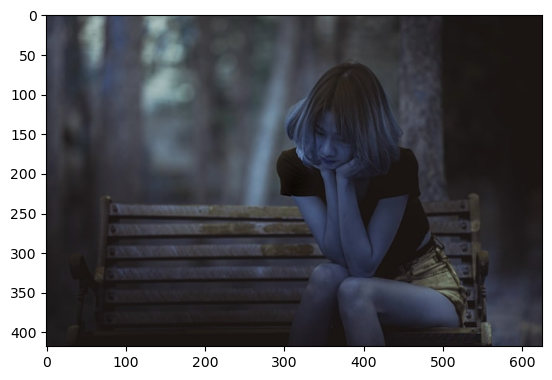

In [26]:
plt.imshow(img)

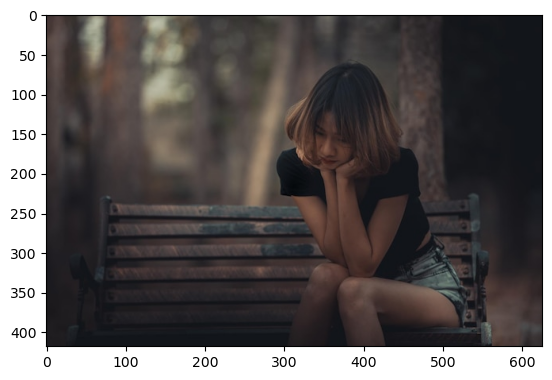

In [25]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
for image_class in folders: # print: happy | sad
    for image in os.listdir(os.path.join(data_dir, image_class)): # print: image list
        image_path = os.path.join(data_dir, image_class, image) # get image dir
        try:
            # 读取图片，返回 numpy  (height, width, channels)   
            # height 是图像的高度（以像素为单位）
            # width 是图像的宽度（以像素为单位）
            # channels 是图像的通道数（对于彩色图像，通常为 3，对应红、绿、蓝三个颜色通道）
            img = cv2.imread(image_path)  
            tip = imghdr.what(image_path) # 获取图片类型，用于过滤图片
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)

        except Exception as e:
            print('Issue with images {}'.format(image_path)) 
            # os.remove(image_path)

##### 1.3 Load Data

In [28]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [29]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [30]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 157 files belonging to 2 classes.


In [31]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [33]:
data_iterator = data.as_numpy_iterator()

In [34]:
data_iterator

In [35]:
batch = data_iterator.next()

2023-06-20 12:51:32.285556: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [40]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [43]:
# Class 1 = SAD PPL
# Class 0 = HAPPY PPL
batch[1]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int32)

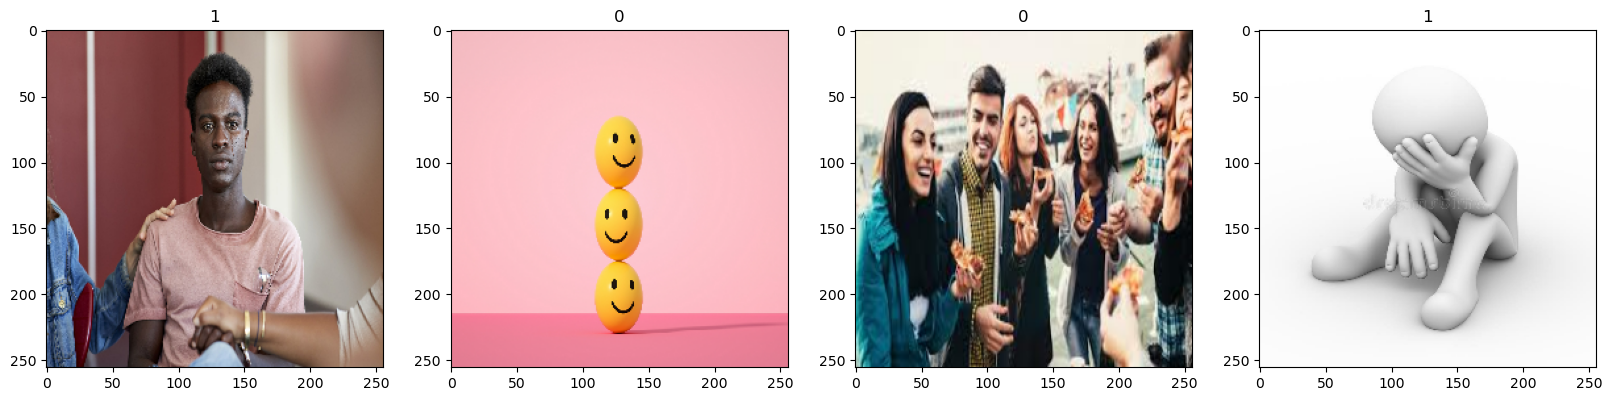

In [42]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])